# 子结构操作
RDKit包含了一些修改分子的函数，这些函数可以方便地对分子进行子结构删除/替换等操作。更复杂的操作可以看Chemical Reactions中相关的功能。

## 1.删除子结构
* 先初始化一下<br />
定义一个苯丙氨酸分子，要把苯甲基删掉，变成甘氨酸

In [31]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
m = Chem.MolFromSmiles('C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O') # 槲皮素(quercetin)
#m = Chem.MolFromSmiles('c1ccccc1CC(N)C(=O)O')
patt = Chem.MolFromSmarts('[OH]')

* 查看patt是否在m中：GetSubstructMatches()<br />
返回值是原分子中与子结构匹配的原子索引

In [32]:
matches = m.GetSubstructMatches(patt)
matches

((17,), (18,), (19,), (20,), (21,))

* 查看槲皮素(quercetin)的原子编号

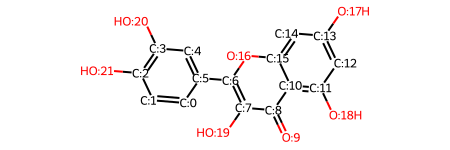

In [33]:
# 显示槲皮素(quercetin)的原子编号
from rdkit.Chem import Draw
mol = Chem.MolFromSmiles('C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O') 
#为分子加上原子序号
def add_atom_index(mol):
    atoms = mol.GetNumAtoms()
    for i in range( atoms ):
        mol.GetAtomWithIdx(i).SetProp(
            'molAtomMapNumber', str(mol.GetAtomWithIdx(i).GetIdx()))
    return mol
add_atom_index(mol)
mol

* 查看分子及高亮显示子结构

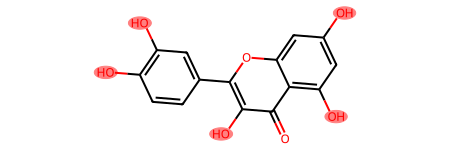

In [34]:
m

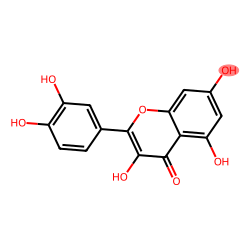

In [35]:
Draw.MolToImage(m, (250,250), highlightAtoms=matches[0]) # 默认映射第17个原子

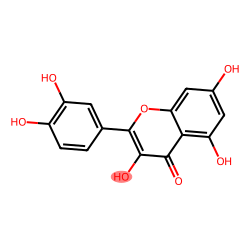

In [36]:
Draw.MolToImage(m, (250,250), highlightAtoms=matches[2]) # 默认映射第19个原子

* **删除子结构：DeleteSubstructs(mol, query, onlyFrags, useChirality)**<br />
mol: 要操作的mol对象<br />
query: 要操作的子结构<br />
onlyFrags: 默认False，即只要匹配一致就删除。为True时，只有当匹配且为一个单独的片段才删除<br />
useChirality: 匹配手性，默认False<br />
原始的分子不会被改变，新的分子将作为返回值返回

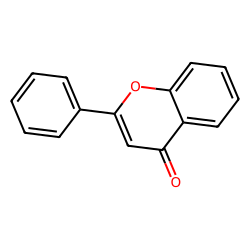

In [6]:
# rm = Chem.DeleteSubstructs(m, patt) # 将所有羟基都删除
# Draw.MolToImage(rm, (250,250))

## 2.替换子结构
现在把苯甲基变成羟甲基，也就是丝氨酸
* 设置要替换的结构

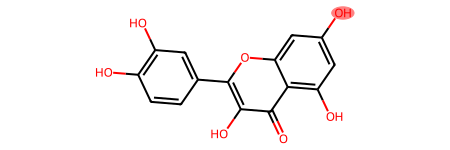

In [37]:
repl = Chem.MolFromSmiles('CC1C(C(C(C(O1)O)O)O)O') # 鼠李糖的Smile
m.GetSubstructMatch(patt) # 默认隐射到第一个羟基，索引为[0]；对应槲皮素的原子编号为17
m

* **替换子结构：ReplaceSubstructs(mol, query, replacement, replaceAll, replacementConnectionPoint, useChirality)**<br />
mol: 要操作的mol对象<br />
query: 要操作的子结构<br />
replacement：要替换上去的结构<br />
replaceAll: 默认False，即如果出现多个匹配的子结构，那就进行多次替换并产生不同的新分子。为True时，对所有匹配结构进行替换并产生一个分子<br />
replacementConnectionPoint：默认0，从哪里成键<br />
useChirality: 匹配手性，默认False

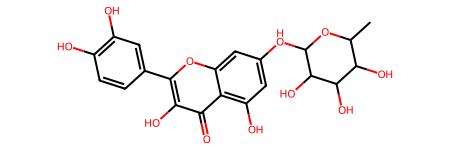

In [38]:
rms = AllChem.ReplaceSubstructs(m, patt, repl, replacementConnectionPoint=7) # 成键原子：鼠李糖原子编号为7的氧原子
rms[0] # 槲皮素的第1个羟基，索引为[0]；原子编号为O-17

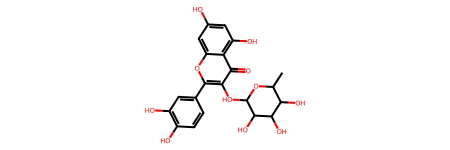

In [40]:
rms = AllChem.ReplaceSubstructs(m, patt, repl, replacementConnectionPoint=7) # 鼠李糖的第7位羟基被替换
mol2=rms[2] # 这里显示的是原来化合物槲皮素的第19位-OH，索引为2
mol2

In [41]:
print(m.GetNumAtoms(mol2))

ArgumentError: Python argument types in
    Mol.GetNumAtoms(Mol, Mol)
did not match C++ signature:
    GetNumAtoms(RDKit::ROMol, int onlyHeavy=-1, bool onlyExplicit=True)

In [ ]:
from rdkit import Chem
m = Chem.MolFromSmiles('CCO')
print(m.GetNumAtoms())
m2 = Chem.AddHs(m)
print(m2.GetNumAtoms())
m2 = Chem.RemoveHs(m2)
print(m2.GetNumAtoms())

In [44]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw

# 槲皮素(quercetin)的SMILES字符串
m = Chem.MolFromSmiles('C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O')

# 定义一个SMARTS模式匹配羟基
patt = Chem.MolFromSmarts('[OH]')

# 找到所有匹配的羟基
matches = m.GetSubstructMatches(patt)

# 创建鼠李糖分子模型
repl = Chem.MolFromSmiles('CC1C(C(C(C(O1)O)O)O)O')

# 使用ReplaceSubstructs方法替换羟基为鼠李糖
rms = AllChem.ReplaceSubstructs(m, patt, repl, replacementConnectionPoint=0) # 注意这里的replacementConnectionPoint应该设置为0，因为这是连接点的索引
mol1 = rms[0]  # 获取第一个替换结果，rms是一个包含所有替换结果的元组

# 获取mol2中原子的数量
num_atoms = mol1.GetNumAtoms()

print(num_atoms)

32


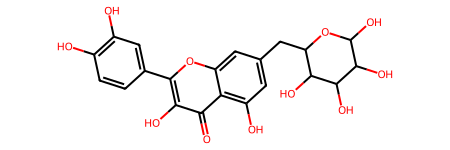

In [45]:
mol1

In [46]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw

# 槲皮素(quercetin)的SMILES字符串
m = Chem.MolFromSmiles('C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O')

# 定义一个SMARTS模式匹配羟基
patt = Chem.MolFromSmarts('[OH]')

# 找到所有匹配的羟基
matches = m.GetSubstructMatches(patt)

# 创建鼠李糖分子模型
repl = Chem.MolFromSmiles('CC1C(C(C(C(O1)O)O)O)O')

# 使用ReplaceSubstructs方法替换羟基为鼠李糖
rms = AllChem.ReplaceSubstructs(m, patt, repl, replacementConnectionPoint=7) # 注意这里的replacementConnectionPoint应该设置为0，因为这是连接点的索引
mol2 = rms[2]  # 获取第一个替换结果，rms是一个包含所有替换结果的元组

# 获取mol2中原子的数量
num_atoms = mol1.GetNumAtoms()

print(num_atoms)

32


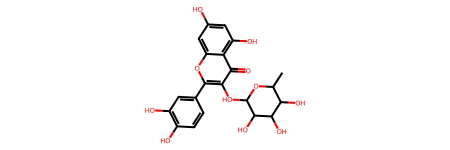

In [47]:
mol2

In [56]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw

# 槲皮素(quercetin)的SMILES字符串
m = Chem.MolFromSmiles('C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O')

# 定义一个SMARTS模式匹配羟基
patt = Chem.MolFromSmarts('[OH]')

# 找到所有匹配的羟基
matches = m.GetSubstructMatches(patt)

# 创建鼠李糖分子模型
repl = Chem.MolFromSmiles('CC1C(C(C(C(O1)O)O)O)O')

# 使用ReplaceSubstructs方法替换羟基为鼠李糖
rms = AllChem.ReplaceSubstructs(m, patt, repl, replacementConnectionPoint=7) # 注意这里的replacementConnectionPoint应该设置为0，因为这是连接点的索引
mol1 = rms[2]  # 获取第三个替换结果，rms是一个包含所有替换结果的元组

# 获取mol2中原子的数量
num_atoms1 = mol1.GetNumAtoms()
print(num_atoms1)

# 删除多余的H原子
mol2 = Chem.RemoveHs(mol1)
num_atoms2 = mol2.GetNumAtoms()
print(num_atoms2)

# 添加所有的H原子
mol3 = Chem.AddHs(mol2)
num_atoms3 = mol3.GetNumAtoms()
print(num_atoms3)

32
32
52


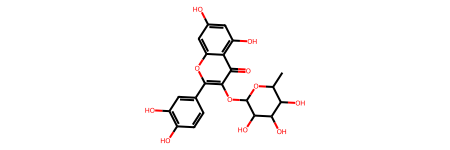

In [57]:
mol2

In [50]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw

# 槲皮素(quercetin)的SMILES字符串
m = Chem.MolFromSmiles('C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O')

# 定义一个SMARTS模式匹配羟基
patt = Chem.MolFromSmarts('[OH]')

# 找到所有匹配的羟基
matches = m.GetSubstructMatches(patt)

# 创建鼠李糖分子模型
repl = Chem.MolFromSmiles('CC1C(C(C(C(O1)O)O)O)O')

# 使用ReplaceSubstructs方法替换羟基为鼠李糖
rms = AllChem.ReplaceSubstructs(m, patt, repl, replacementConnectionPoint=0)
mol1 = rms[0]  # 获取第一个替换结果

# 将mol2转换为SMILES字符串
smiles_mol1 = Chem.MolToSmiles(mol1)

print(smiles_mol2)

O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(CC3OC(O)C(O)C(O)C3O)cc(O)c12


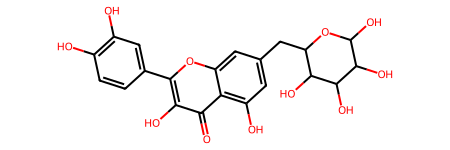

In [51]:
mol1

In [52]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw

# 槲皮素(quercetin)的SMILES字符串
m = Chem.MolFromSmiles('C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O')

# 定义一个SMARTS模式匹配羟基
patt = Chem.MolFromSmarts('[OH]')

# 找到所有匹配的羟基
matches = m.GetSubstructMatches(patt)

# 创建鼠李糖分子模型
repl = Chem.MolFromSmiles('CC1C(C(C(C(O1)O)O)O)O')

# 使用ReplaceSubstructs方法替换羟基为鼠李糖
rms = AllChem.ReplaceSubstructs(m, patt, repl, replacementConnectionPoint=7)
mol2 = rms[2]  # 获取第一个替换结果

# 将mol2转换为SMILES字符串
smiles_mol2 = Chem.MolToSmiles(mol2)

print(smiles_mol2)

CC1OC(Oc2c(-c3ccc(O)c(O)c3)oc3cc(O)cc(O)c3c2=O)C(O)C(O)C1O


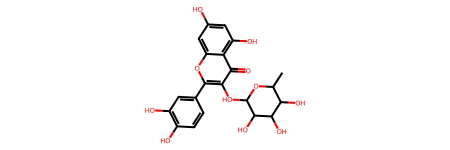

In [53]:
mol2

In [ ]:
from rdkit import Chem
m = Chem.MolFromSmiles('CCO')
print(m.GetNumAtoms())
m2 = Chem.AddHs(m)
print(m2.GetNumAtoms())
m2 = Chem.RemoveHs(m2)
print(m2.GetNumAtoms())

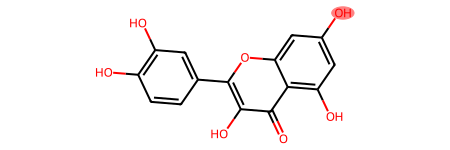

In [26]:
# repl = Chem.MolFromSmiles('CC1OC(O)C(O)C(O)C1O') # 鼠李糖去除第7位氧原子上的氢原子
# m.GetSubstructMatch(patt)
# m

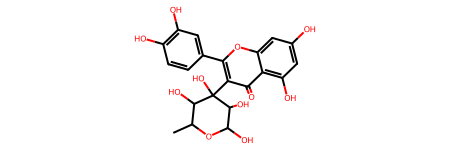

In [27]:
# rms = AllChem.ReplaceSubstructs(m, patt, repl, replacementConnectionPoint=7) # 鼠李糖的第7位羟基被替换
# rms[2] # 这里显示的是原来化合物槲皮素的第19位-OH，索引为2

* 苯丙氨酸变成异亮氨酸<br />
replacementConnectionPoint：默认0，要从哪个原子处成键，这里选择1或2

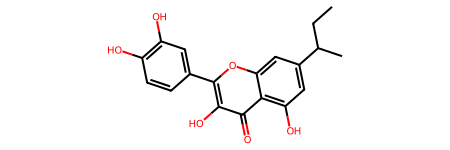

In [9]:
repl = Chem.MolFromSmiles('CCCC')
rms = AllChem.ReplaceSubstructs(m, patt, repl, replacementConnectionPoint=1) # 第2个碳原子
rms[0]

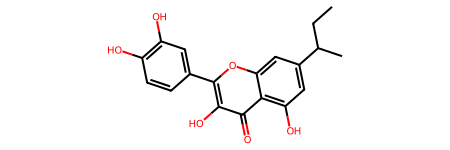

In [10]:
repl = Chem.MolFromSmiles('CCCC')
rms = AllChem.ReplaceSubstructs(m, patt, repl, replacementConnectionPoint=2) # 第3个碳原子
rms[0]

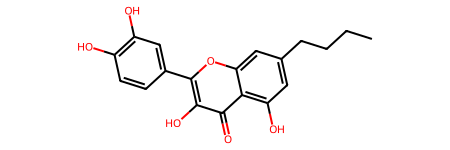

In [11]:
repl = Chem.MolFromSmiles('CCCC')
rms = AllChem.ReplaceSubstructs(m, patt, repl, replacementConnectionPoint=0) # 第1个碳原子
rms[0]

* 有时也会产生一些奇奇怪怪的结构，比如生成个乙酸乙酯<br />
patt中的"[$(OC=O)]"表示寻找羟基氧，而非羰基氧。对SMARTS不明白的可以看看另一篇文章：SMARTS规则速查表。

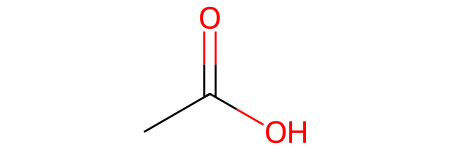

In [12]:
m = Chem.MolFromSmiles('CC(=O)O')
m

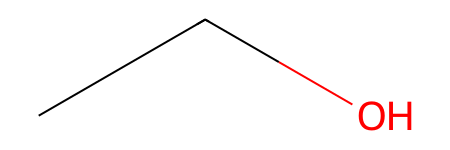

In [13]:
repl = Chem.MolFromSmiles('OCC')
repl

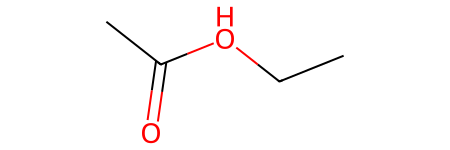

In [14]:
m = Chem.MolFromSmiles('CC(=O)O')
patt = Chem.MolFromSmarts('[$(OC=O)]') # patt中的"[$(OC=O)]"表示寻找羟基氧，而非羰基氧。
repl = Chem.MolFromSmiles('OCC')
rms = Chem.ReplaceSubstructs(m, patt, repl, replacementConnectionPoint=0) # 默认从匹配的repl第1个原子来替换
rms[0]

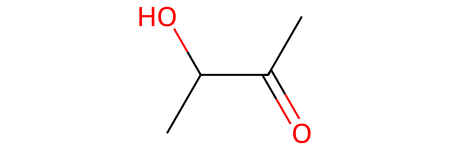

In [15]:
m = Chem.MolFromSmiles('CC(=O)O')
patt = Chem.MolFromSmarts('[$(OC=O)]') # patt中的"[$(OC=O)]"表示寻找羟基氧，而非羰基氧。
repl = Chem.MolFromSmiles('OCC')
rms = Chem.ReplaceSubstructs(m, patt, repl, replacementConnectionPoint=1)
rms[0]

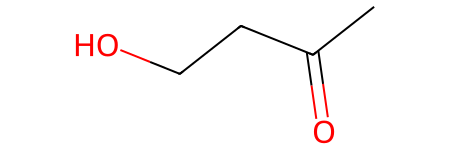

In [16]:
m = Chem.MolFromSmiles('CC(=O)O')
patt = Chem.MolFromSmarts('[$(OC=O)]') # patt中的"[$(OC=O)]"表示寻找羟基氧，而非羰基氧。
repl = Chem.MolFromSmiles('OCC')
rms = Chem.ReplaceSubstructs(m, patt, repl, replacementConnectionPoint=2)
rms[0]

* 检查分子：Chem.SanitizeMol(rms[0])<br />
计算凯库勒式、检查化合价、芳香性、共轭及杂化

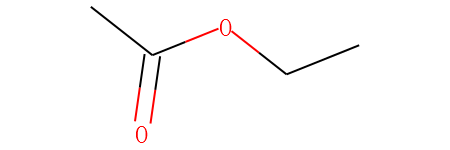

In [10]:
Chem.SanitizeMol(rms[0])
rms[0]

## 3.切掉侧链
保留氨基酸的母核：NH2-C-COOH
* **切掉侧链，保留母核：ReplaceSidechains(mol, coreQuery , useChirality)**<br />
mol: mol对象<br />
coreQuery: 母核结构<br />
useChirality: 匹配手性，默认False

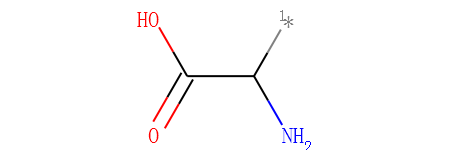

In [11]:
m = Chem.MolFromSmiles('c1ccccc1CC(N)C(=O)O')
core = Chem.MolFromSmiles('NCC(=O)O')
m1 = Chem.ReplaceSidechains(m, core)
m1

## 4.切掉母核
保留R基，去除母核
* **切掉母核：ReplaceCore(mol, core , ...)**<br />
mol: mol对象<br />
coreQuery: 母核结构<br />
保留侧链，去掉母核

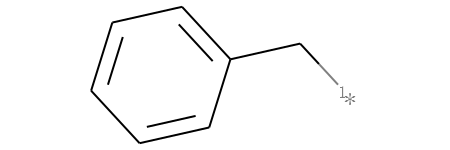

In [12]:
r = AllChem.ReplaceCore(m, core)
r

* **获取侧链片段：GetMolFrags(mol, asMols, sanitizeFrags, ...)**<br />
asMols：默认False，即返回原子索引。True时，将片段转成mol对象<br />
sanitizeFrags：默认True，即返回时会进行检查。

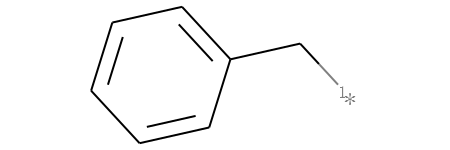

In [13]:
side_mols = Chem.GetMolFrags(r, asMols=True)
side_mols[0]

* **获取多个侧链片段**

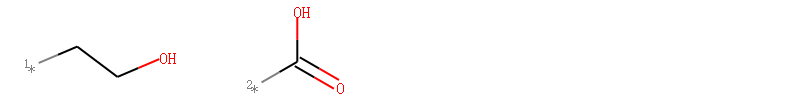

In [14]:
m1 = Chem.MolFromSmiles('c1c(CCO)ncnc1C(=O)O')
core = Chem.MolFromSmiles('c1cncnc1')
tmp = AllChem.ReplaceCore(m1, core)
side_mols = Chem.GetMolFrags(tmp, asMols=True)
Draw.MolsToGridImage([x for x in side_mols], molsPerRow=4, subImgSize=(200,100))

## 5.其他分子切分方法
- BRICS算法，基于可合成的键进行拆分分子
- Recap算法，模仿实验中的正向合成来做逆向拆分

此外，rdkit中还提供了非常灵活的函数，用来对指定的键进行拆解来获得分子片段，下面以断裂掉所有环中原子和环外原子间的键为例，来做一个简要的介绍。
- 先定义一个包含环状结构的分子
- 通过SMARTS定义要断裂键所涉及的原子
- 查找匹配所有符合SMARTS的子结构

((0, 1), (4, 3), (6, 5), (7, 8))


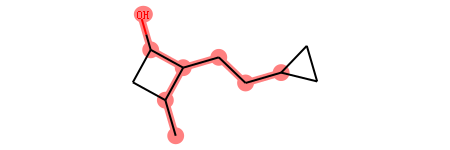

In [15]:
m = Chem.MolFromSmiles('CC1CC(O)C1CCC1CC1')
patt = Chem.MolFromSmarts('[!R][R]')
bis = m.GetSubstructMatches(patt)
print(bis)
m

In [16]:
Draw.MolToFile(m, 'data/substructure_delete_replace_split_6.png', size=(150, 150))

- 遍历匹配上的原子对
- 通过匹配得到的原子索引，获取相应的键：GetBondBetweenAtoms()
- 获得键的索引：GetIdx()

In [17]:
bs = [m.GetBondBetweenAtoms(x, y).GetIdx() for x, y in bis]
bs

[0, 3, 5, 7]

- 通过断裂键来获取片段：FragmentOnBonds(mol, bondIndices, addDummies, bondTypes , ...)<br />
mol：要拆解的分子<br />
bondIndices：键的索引<br />
addDummies：默认True，即添加一个虚原子来标明断裂的位置<br />
bondTypes：片段和虚原子之间用什么键连接，默认是单键

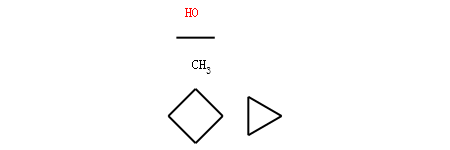

In [18]:
nm = Chem.FragmentOnBonds(m, bs, addDummies=False)
nm

In [19]:
Draw.MolToFile(nm, 'data/substructure_delete_replace_split_7.png', size=(200, 200))

- 从一个混合物中，获取所有片段：Chem.GetMolFrags()

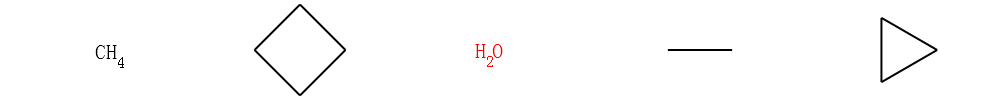

In [20]:
mol_list = Chem.GetMolFrags(nm, asMols=True)
img = Draw.MolsToGridImage(mol_list, molsPerRow=5, subImgSize=(200,100))
img

In [21]:
img.save('data/substructure_delete_replace_split_8.png')

- 默认情况下，使用FragmentOnBonds()时，断开的位置会用被移开的原子序号进行标记，我们也可以通过设置dummyLabels参数来自定义序号。该参数中每个元素的第一个数字表示键连接的第一个原子（键的起始原子），第二个数字表示键连接的第二个原子（键的结尾原子）。接着使用上面的例子说明一下，将环上的原子标记为1，将非环上的原子标记为10。

In [22]:
m = Chem.MolFromSmiles('CC1CC(O)C1CCC1CC1')
patt = Chem.MolFromSmarts('[!R][R]')
bis = m.GetSubstructMatches(patt)
bs = []
labels = []
for bi in bis:
    b = m.GetBondBetweenAtoms(bi[0], bi[1])
    if b.GetBeginAtomIdx() == bi[0]:
        labels.append((10, 1))
    else:
        labels.append((1, 10))
    bs.append(b.GetIdx())
nm = Chem.FragmentOnBonds(m, bs, dummyLabels=labels)
Chem.MolToSmiles(nm, True)

'[1*]C.[1*]CC[1*].[1*]O.[10*]C1CC([10*])C1[10*].[10*]C1CC1'